In [2]:
import pandas as pd

# EDA

In [5]:
#Cargar archivo csv

df=pd.read_csv('C:/Users/Administrator/Desktop/Proyecto_ML Refuerzo/ML_Refuerzo_Esther/scr/data/teleCust1000t.csv')

In [10]:
#Primeras 5 filas

print (df.head()) 

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [8]:
#Nombre columnas

print (df.columns)

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [11]:
#Información general del DataFrame

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None


In [12]:
#Estadísticas descriptivas

print(df.describe())

          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.0000

In [14]:
#Suma de valores nulos por columna

print (df.isnull().sum())

#Total de valores nulos

print (df.isnull().sum().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64
0


<function matplotlib.pyplot.show(close=None, block=None)>

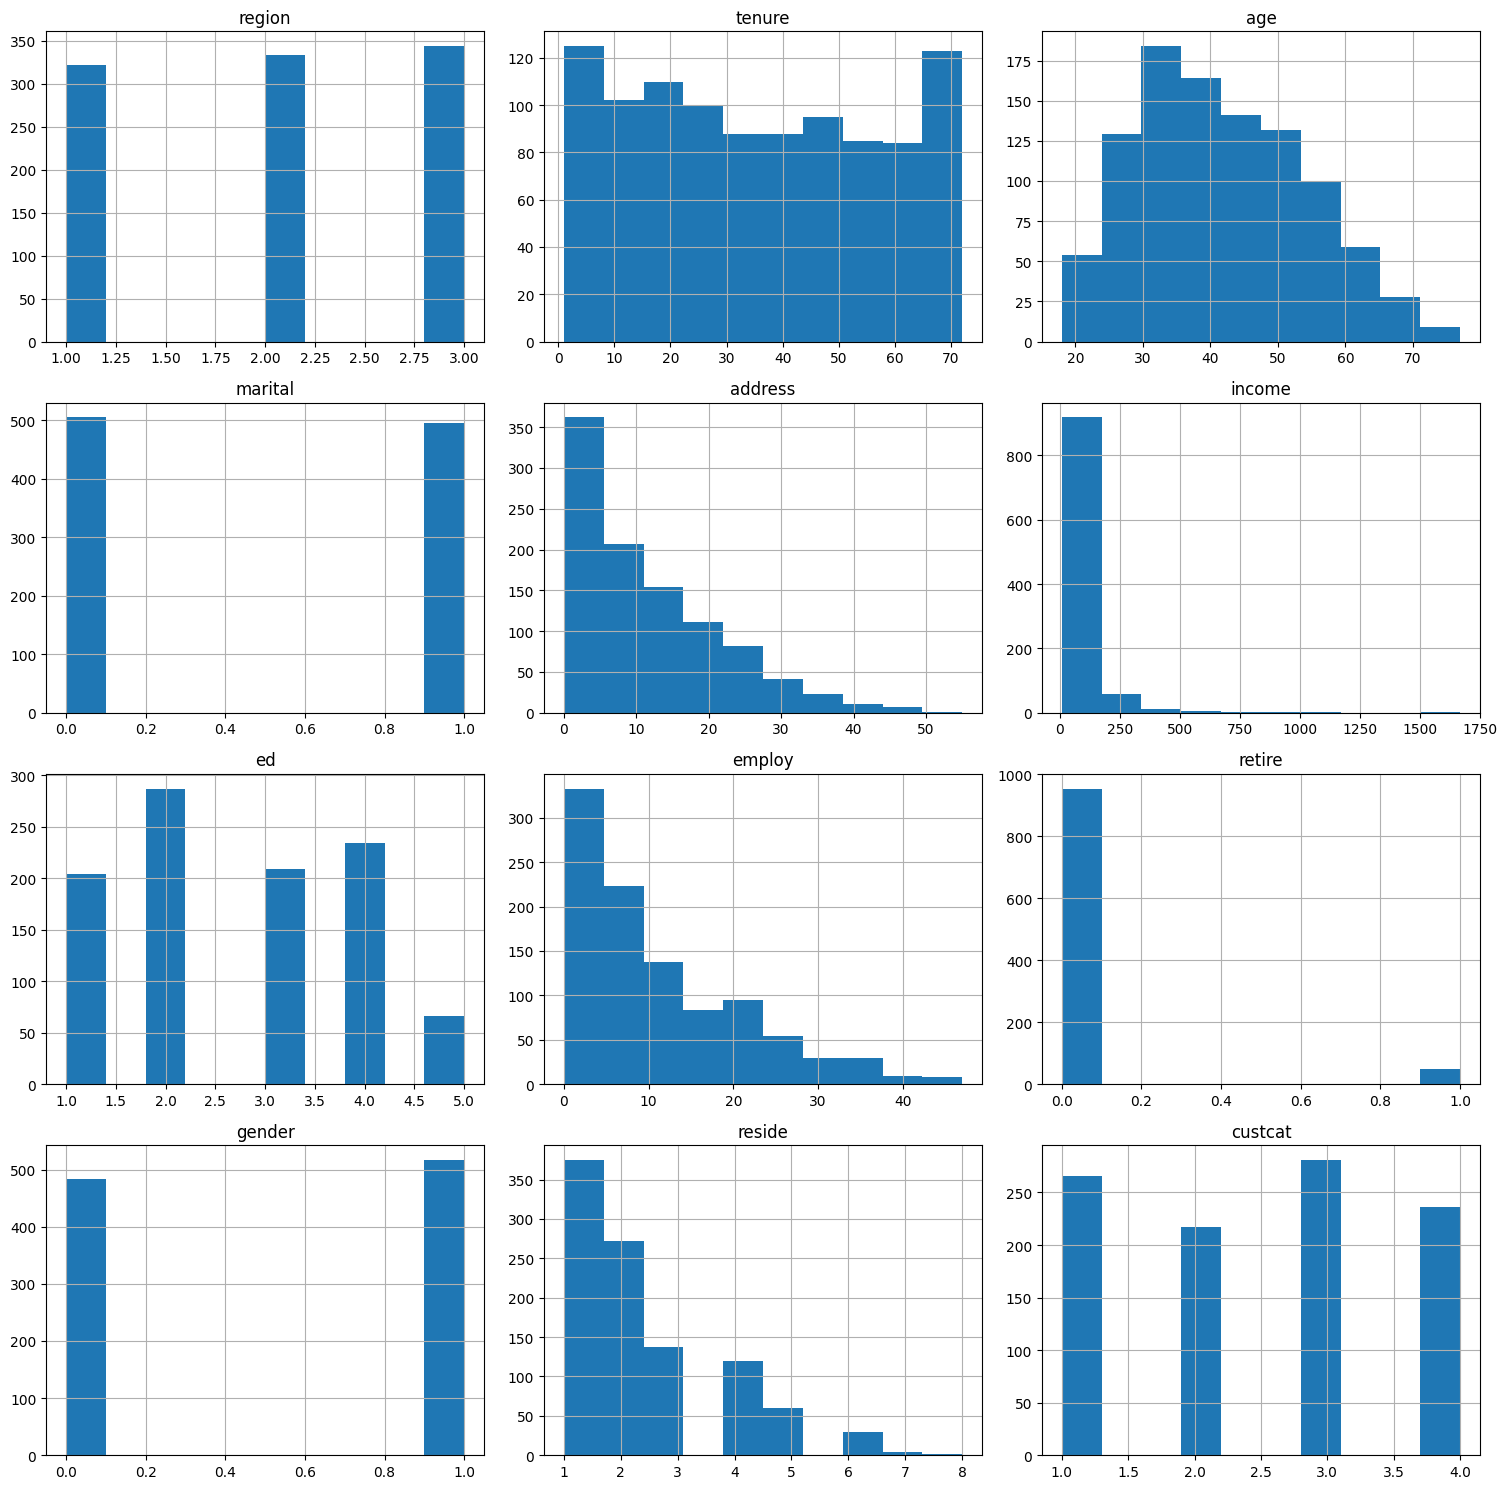

In [18]:
#Histograma para distribuciones
import matplotlib.pyplot as plt

df.hist (figsize=(15,15))
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

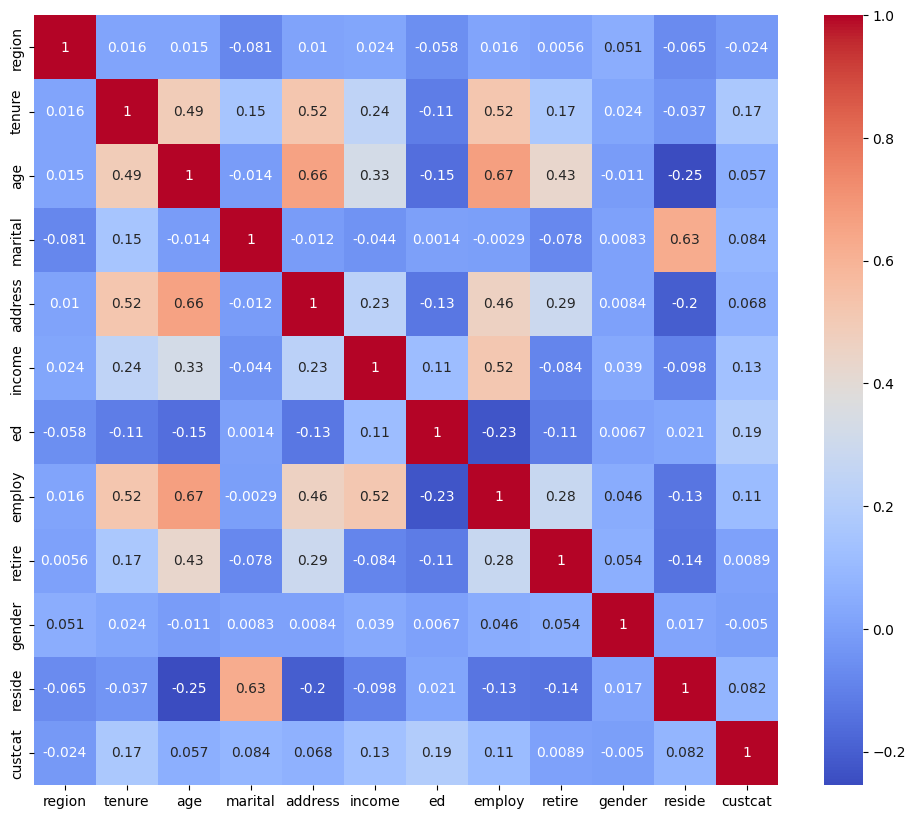

In [20]:
#Matriz de correlación

import seaborn as sns

correlation_matrix = df.corr()
plt.figure (figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show

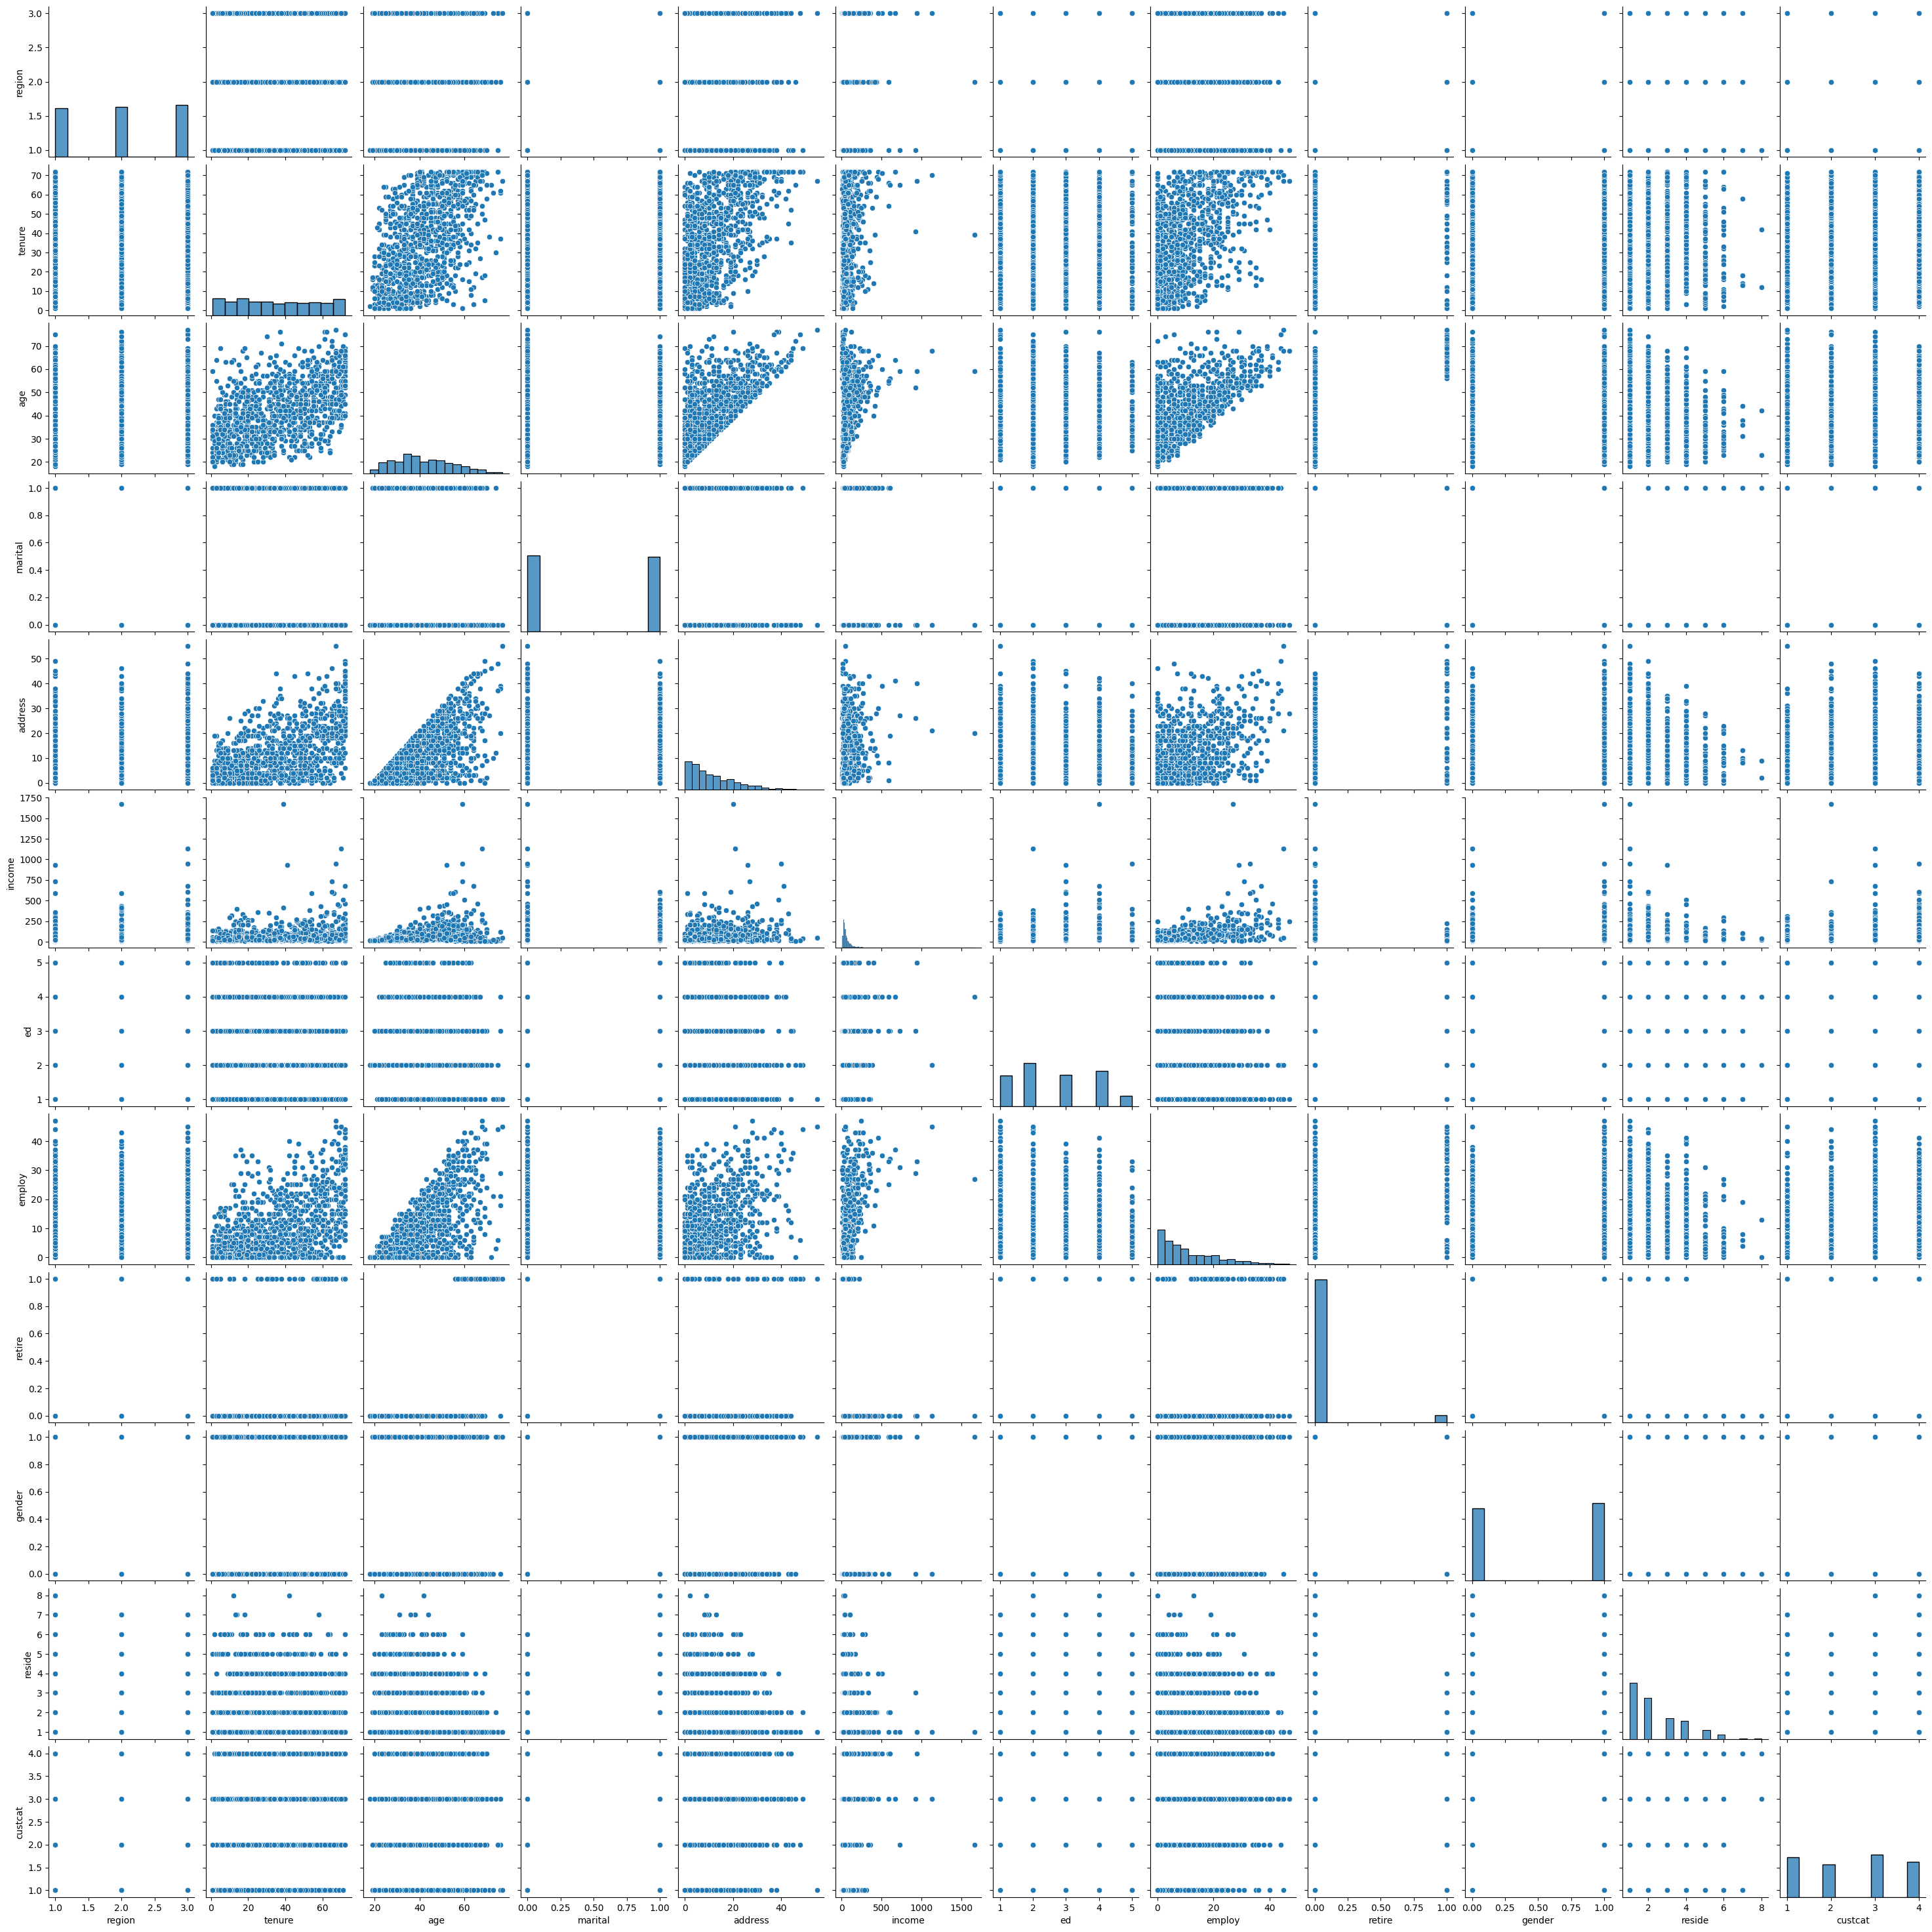

In [21]:
#Relaciones entre variables númericas

sns.pairplot(df)
plt.show()

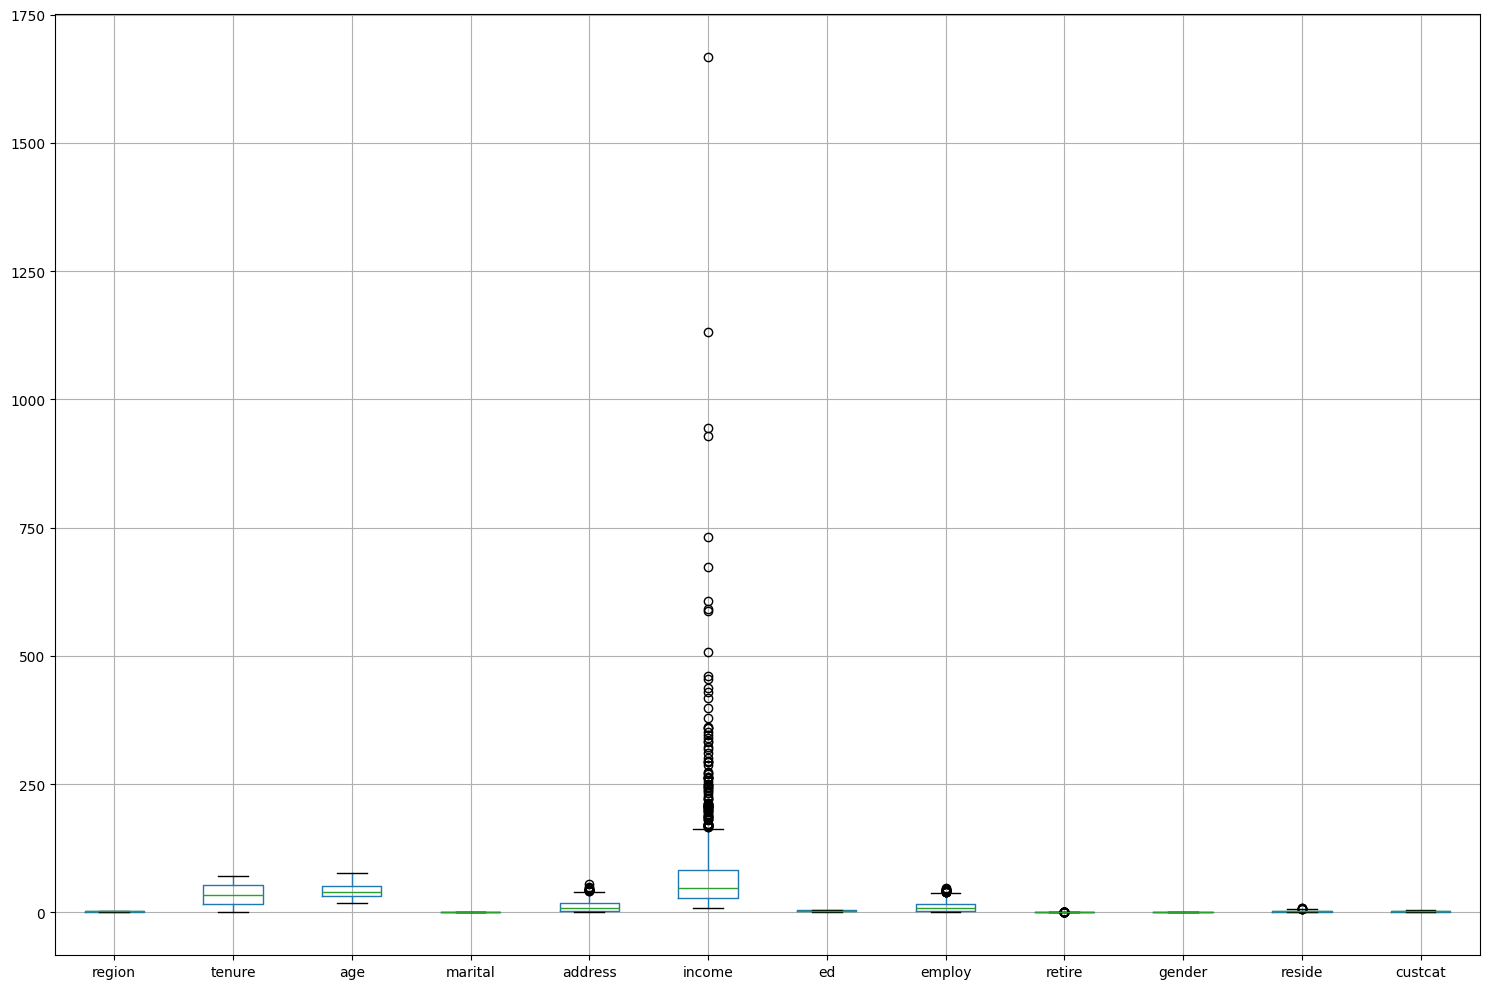

In [22]:
#Boxplots para detectar outliers

df.boxplot(figsize=(15,10))
plt.tight_layout()
plt.show()

"\ndf ['custcat'].value_counts().plot(kind='bar')\nplt.title('Distribución de Categorías de Clientes')\nplt.show()\n"

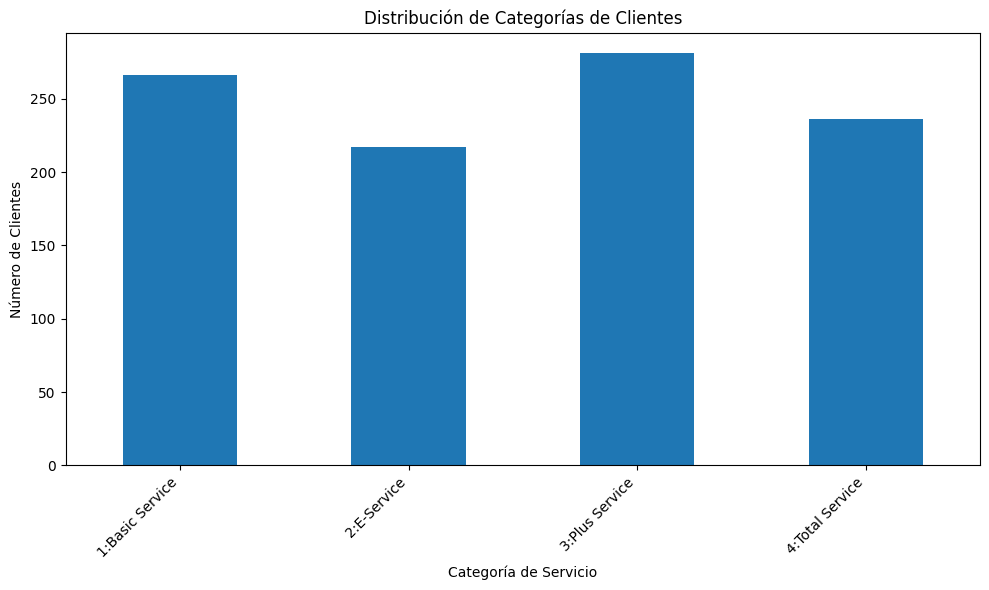

In [24]:
#Gráfico de barras para la variable objetivo

#Crear un diccionario que mapee los números a los nombres de los servicios

service_names= {
    1: 'Basic Service' ,
    2: 'E-Service',
    3: 'Plus Service',
    4: 'Total Service'
}

#Contar los valores y ordenarlos

value_counts= df ['custcat'].value_counts().sort_index()

#Crear el gráfico de barras

ax=value_counts.plot (kind='bar', figsize=(10,6))

#Personalizar las etiquetas del eje x

plt.xticks(range(len(value_counts)), [f"{i}:{service_names[i]}" for i in value_counts.index] , rotation=45, ha='right')

plt.title('Distribución de Categorías de Clientes')
plt.xlabel('Categoría de Servicio')
plt.ylabel('Número de Clientes')

#Ajustar el diseño para evitar que se corten las etiquetas

plt.tight_layout()

plt.show



# Modelaje

In [37]:
# Separar features y variable objetivo

x= df.drop('custcat', axis=1)
y= df['custcat']


In [32]:
#Normalización de variables numéricas
"""
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)
"""


In [38]:
#División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
#Crear y entrenar el modelo
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

#Realizar predicciones

y_pred=rf_model.predict(x_test)

In [45]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    
    rf_model = RandomForestClassifier(**rf_params, random_state=42)
    return cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Crear y entrenar el modelo con los mejores hiperparámetros
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(x_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(x_test)

[I 2024-11-27 15:01:41,839] A new study created in memory with name: no-name-15f16d0e-978a-44b5-9bba-efdcb11a4764
[I 2024-11-27 15:01:42,571] Trial 0 finished with value: 0.39499999999999996 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.39499999999999996.
[I 2024-11-27 15:01:44,884] Trial 1 finished with value: 0.38 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.39499999999999996.
[I 2024-11-27 15:01:45,318] Trial 2 finished with value: 0.39625000000000005 and parameters: {'n_estimators': 57, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.39625000000000005.
[I 2024-11-27 15:01:46,014] Trial 3 finished with value: 0.39375 and parameters: {'n_estimators': 93, 'max_depth': 6, 'min_samples_split': 3, 'min

Mejores hiperparámetros: {'n_estimators': 132, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}


In [47]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Realizar predicciones
y_pred = rf_model.predict(x_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación (incluye precision, recall, f1-score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Evaluar overfitting
train_accuracy = rf_model.score(x_train, y_train)
test_accuracy = rf_model.score(x_test, y_test)
print(f"\nAccuracy en entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en prueba: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.05:
    print("Hay indicios de overfitting")
else:
    print("No hay indicios claros de overfitting")

Accuracy: 0.3600
Matriz de Confusión:
[[26  9 13 12]
 [ 6  4 16 13]
 [13  3 30  9]
 [17  5 12 12]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.42      0.43      0.43        60
           2       0.19      0.10      0.13        39
           3       0.42      0.55      0.48        55
           4       0.26      0.26      0.26        46

    accuracy                           0.36       200
   macro avg       0.32      0.34      0.32       200
weighted avg       0.34      0.36      0.34       200


Accuracy en entrenamiento: 0.6875
Accuracy en prueba: 0.3600
Hay indicios de overfitting
